# Linear regression with one variable

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

**Ex. 1.** Use the head and describe function to examine the data and display few columns.

In [229]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [230]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


**Ex. 2.** Plot and analyze the data, where: x - population, y - profit.

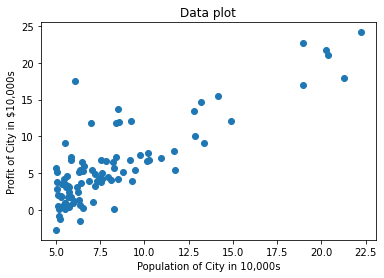

In [231]:
plt.scatter(data["Population"], data["Profit"])
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit of City in $10,000s")
plt.show()

**Ex. 3.** In order to make the cost function work (intercept value θ0 has to be multiplied by 1) we need to insert a column of ones at the beginning of the data frame.

In [232]:
data.insert(0, "Theta0", 1)

In [233]:
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
X.head()

,Theta0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [234]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

Converting data frames to numpy matrices and Theta initialization

In [235]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0]))

**Ex. 5** The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [236]:
def computeCost(X, y, theta):
  m = y.shape[1]
  J = (1/(2*m)) * np.sum(np.power(theta@X.T - y, 2))
  return J

**Ex. 6** Test the cost function with (θ=0).
Output: 32.07 (may differ…)

In [237]:
computeCost(X, y, theta)

32.072733877455676

**Ex. 7** Please implement the gradient descent algorithm:

the function returns optimized values θ

and a vector of the cost function value for each iteration

In [238]:
def simple_gradient(X, y, theta, alpha, it):
  # it - number of iterations
  m = y.shape[1]
  theta = np.copy(theta)
  cost = list()
  for i in range(it):
    J = computeCost(X, y, theta)
    cost.append(J)
    h = np.dot(theta,X.T)
    theta[0,0] = theta[0,0] - alpha * (1/m) * np.sum(h - y)
    theta[0,1:] = theta[0,1:] - alpha * (1/m) * np.dot((h - y), X[:, 1:])
  cost.append(computeCost(X, y, theta))
  return theta, cost

In [239]:
alpha = 0.01
it = 1000

**Ex. 8** Please calculate the optimal parameters for the dataset.

In [240]:
theta_out, cost = simple_gradient(X, y, theta, alpha, it)

**Ex. 9** Please calculate the cost function for the given (zad.8) θ.

In [241]:
print(f"Cost for learned theta: {computeCost(X, y, theta_out)}")

Cost for learned theta: 4.515955503078913


**Ex. 10** Plot the regression function and our dataset.

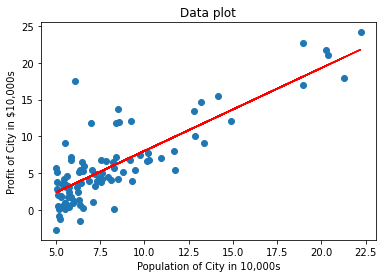

In [242]:
plt.figure()
plt.scatter(data["Population"], data["Profit"])
h = np.dot(theta_out, X.T).T
plt.plot(data["Population"], h, 'r')
plt.title("Data plot")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit of City in $10,000s")
plt.show()

**Ex. 11** Plot the relationship between the cost function and number of iterations.

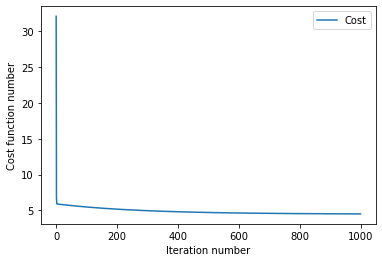

In [243]:
plt.plot([i for i in range(len(cost))], cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function number")
plt.legend(["Cost"])
plt.show()

# Linear regression with multiple variables

In [244]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [245]:
data2.insert(0, "Theta0", 1)
X = data2.iloc[:, 0:3]
y = data2.iloc[:, 3]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0,0.0]))


**Ex. 1.** Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [246]:
X_standarized = np.copy(X).astype(float)
# omit bias standardization
X_standarized[:,1:] = (X_standarized[:,1:] - X_standarized[:,1:].mean(0)) / (X_standarized[:,1:].std(0))

**Ex.2** Please perform steps 3-11 from the previous task by using the same functions.

In [247]:
theta = np.matrix([0.0, 0.0, 0.0])
alpha = 0.01
it = 1000
theta_out, cost = simple_gradient(X_standarized, y, theta, alpha, it)

In [248]:
print(f"Otput Theta: {theta_out}, cost={cost[-1]}")

Otput Theta: [[340397.96353532 108742.65627238  -5873.22993383]], cost=2043498948.1433072


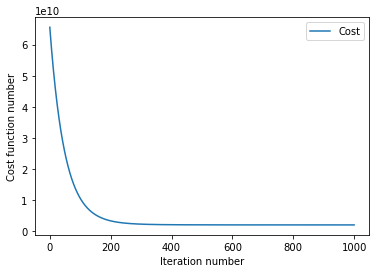

In [249]:
plt.plot([i for i in range(len(cost))], cost)
plt.xlabel("Iteration number")
plt.ylabel("Cost function number")
plt.legend(["Cost"])
plt.show()

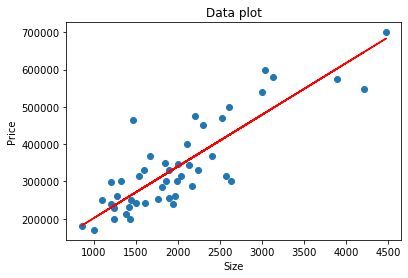

In [250]:
plt.figure()
plt.scatter(data2["Size"], data2["Price"])
h = np.dot(theta_out[:,0:2], X_standarized[:,0:2].T).T
plt.plot(X[:,1], h, 'r')
plt.title("Data plot")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

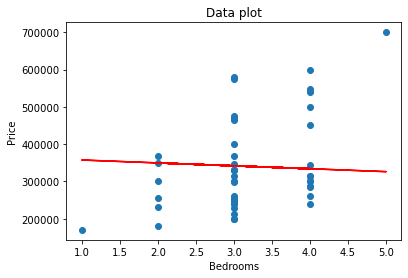

In [251]:
plt.figure()
plt.scatter(data2["Bedrooms"], data2["Price"])
h = np.dot(theta_out[:,[0,2]], X_standarized[:,[0,2]].T).T
plt.plot(X[:,2], h, 'r')
plt.title("Data plot")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# Linear regression - Python packages

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Ex. 1.** Divide the database into training and testing.

In [253]:
boston_X[10:12, :]

array([[2.2489e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
        6.3770e+00, 9.4300e+01, 6.3467e+00, 5.0000e+00, 3.1100e+02,
        1.5200e+01, 3.9252e+02, 2.0450e+01],
       [1.1747e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
        6.0090e+00, 8.2900e+01, 6.2267e+00, 5.0000e+00, 3.1100e+02,
        1.5200e+01, 3.9690e+02, 1.3270e+01]])

In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(boston_X)
boston_X_scaled = scaler.transform(boston_X)
boston_X_scaled[10:12, :]

array([[-0.39434624,  0.04877224, -0.47665354, -0.27259857, -0.26515405,
         0.13158947,  0.91479923,  1.21297914, -0.52300145, -0.57751897,
        -1.50523663,  0.39302804,  1.09292612],
       [-0.40684705,  0.04877224, -0.47665354, -0.27259857, -0.26515405,
        -0.39268492,  0.50940871,  1.15593484, -0.52300145, -0.57751897,
        -1.50523663,  0.44105193,  0.08647836]])

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston_X_scaled, boston_Y, test_size=0.1)

**Ex. 2.** According to the above example, please implement linear regression model for the dataset. Please calculate the statistical metrics for the model including MSE and R2?

In [256]:
reg_LinReg = linm.LinearRegression()
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet = linm.ElasticNet(alpha = .5, l1_ratio=0.5)

In [257]:
models = [reg_LinReg, reg_Ridge, reg_Lasso, reg_ElNet]
for model in models:
    model.fit(X_train, Y_train)

In [258]:
Y_pred = list()

for model in models:
    Y_pred.append(model.predict(X_test))

In [259]:
Y_pred[0] - Y_test

array([  2.71606954,  -0.61747705,   2.27205917,   4.17431392,
         4.72078383,   2.15836385,   1.07044563,   1.83816974,
        -8.08756906,  -0.95179964,  -5.4390985 ,  -2.94023185,
         7.18081508,   0.08528683,   1.10114807,   3.30777651,
         0.04495361,   0.03811902,  -0.20508135,   1.76846071,
         0.95088237,   1.09361754,  -3.99411765,  -7.03078016,
         4.20992082,  -3.34960915,   4.67997236,  -2.8692258 ,
         0.40406607,   3.51006675,  -0.10881432,   5.60046943,
        -8.79165005,  -0.03813205,   5.627967  ,   4.49628559,
         1.73360115,   3.4258167 ,   3.80397731,   1.48784942,
         4.31069644,   5.07928537,  -1.45597827,   4.74189686,
       -24.51251282,  -4.24257013,  -4.89873431,   3.38134159,
        -6.29580125,  -4.05820076,  -0.43419142])

In [260]:
from sklearn.metrics import mean_squared_error, r2_score

for model, i in zip(models, range(len(models))):
    print(f"\n{model.__class__.__name__}: \
            \nMSE = {mean_squared_error(Y_pred[i], Y_test)}, \
            \nR2 = {r2_score(Y_pred[i], Y_test)}")



LinearRegression:             
MSE = 26.350311712194177,             
R2 = 0.5813363497151487

Ridge:             
MSE = 26.333076285991254,             
R2 = 0.5808432321141812

Lasso:             
MSE = 72.36899442577034,             
R2 = -27.25705138805234

ElasticNet:             
MSE = 30.632091488471513,             
R2 = 0.28037515250245004


Wnioski: Większość modeli osiąga podobne wyniki, negatywnie wybija się regresja Lasso

**Ex. 3.** Plot the linear regression for each atribute in the Boston dataset. Iterative or using subplots.

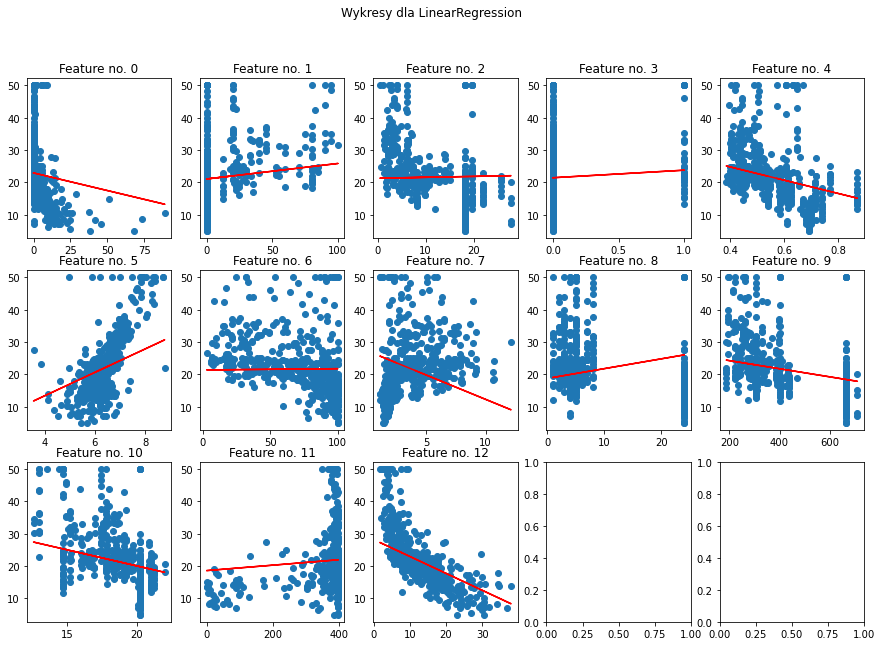

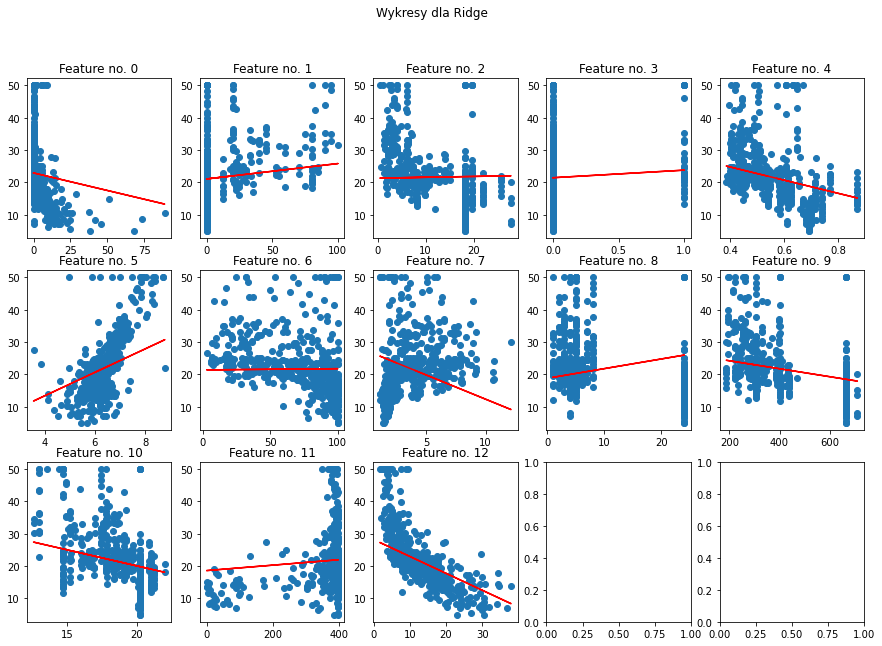

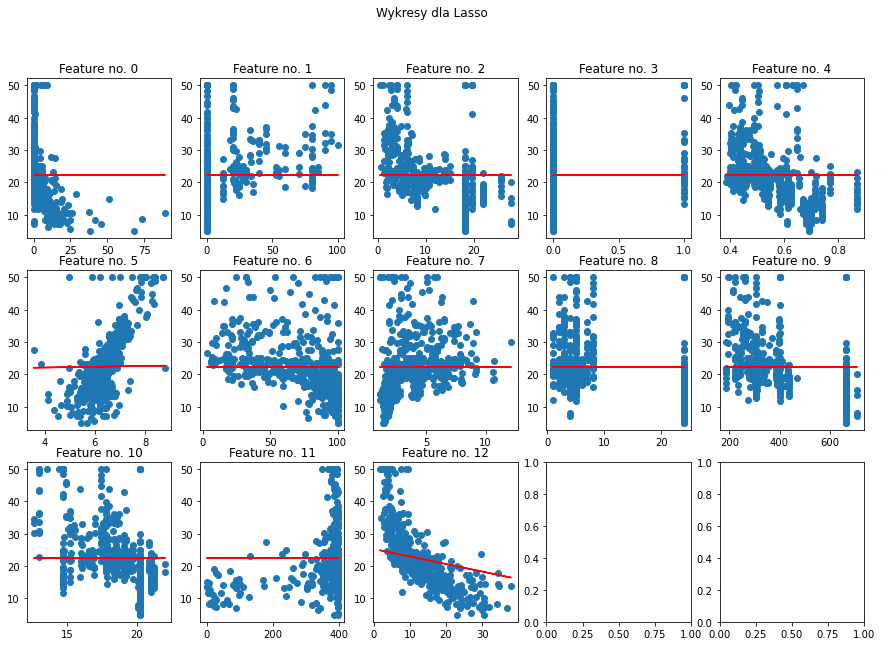

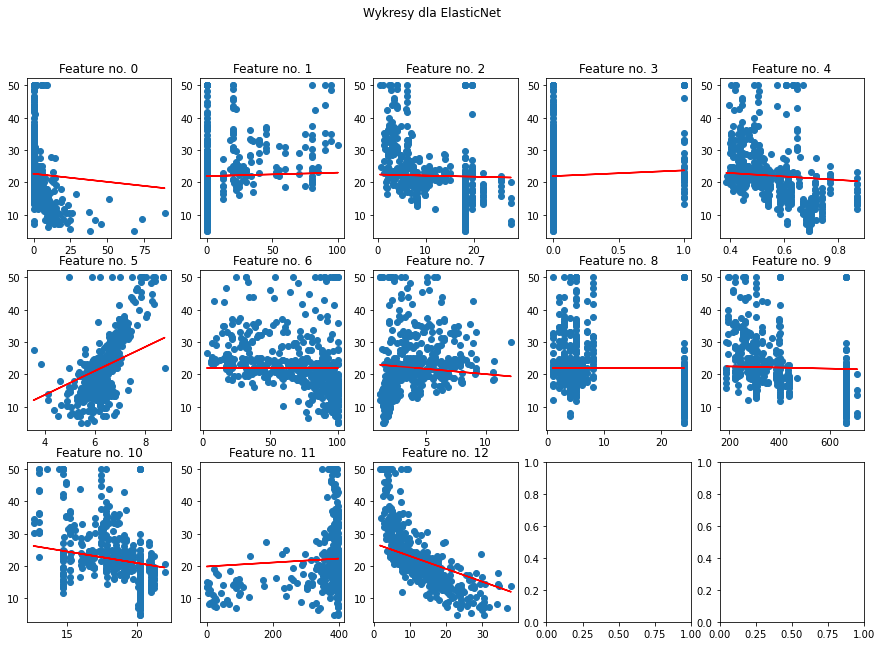

In [271]:
for model in models:
    fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
    for ax, feature in zip(axs.flat, range(model.n_features_in_)):
        X_temp = np.zeros(boston_X_scaled.shape)
        X_temp[:,0] = 1
        X_temp[:,feature] = boston_X_scaled[:,feature]
        ax.scatter(boston_X[:,feature], boston_Y)
        ax.plot(boston_X[:,feature], model.predict(X_temp),'r')
        ax.set_title(f"Feature no. {feature}")

    plt.suptitle(f"Wykresy dla {model.__class__.__name__}")
    plt.show()

## Wnioski: 
Wykresy pozwalają dowiedzieć się więcej o przyczynie słabego działania modelu Lasso - większość parametrów została wyzerowana (czego można się było spodziewać - regularyzacja Lasso działa właśnie w ten sposób, tzn. zerując parametry które uzna za mało istotne) przez co model jest zbyt prosty 